In [ ]:
# pip install matplotlib


####바닐라####


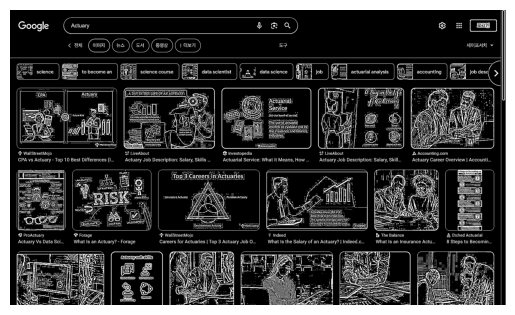

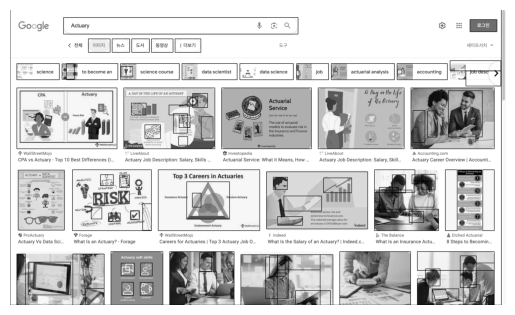

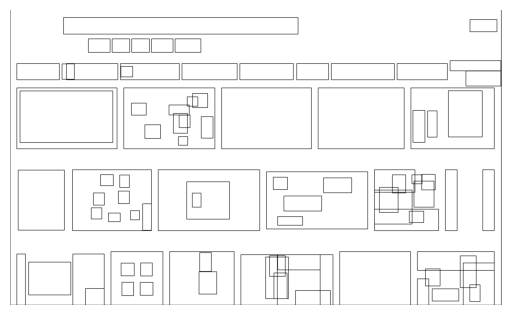

##################
 
####모폴로지 연산 적용####


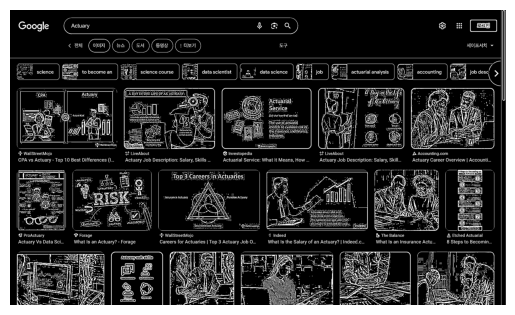

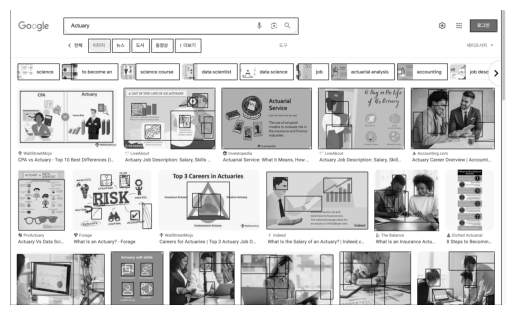

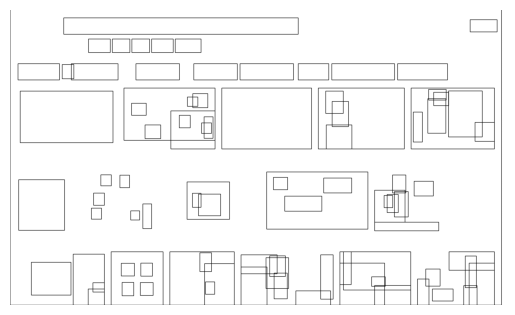

##################


In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(path):
    """이미지 불러오기 및 그레이스케일 변환"""
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def apply_adaptive_threshold(gray_image):
    """적응형 임계값 적용"""
    return cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)


def display_image(image):
    """이미지 표시"""
    plt.imshow(image, cmap='gray')  # 이미지가 그레이스케일이므로 cmap을 'gray'로 설정
    plt.axis('off')
    plt.show()

def extract_bounding_boxes(binary_image, min_side_length=50):  # 기본값을 50픽셀로 설정
    """이미지에서 바운딩박스 추출"""
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > min_side_length and h > min_side_length:
            boxes.append([x, y, x+w, y+h])
    return boxes

def draw_bounding_boxes(image, boxes, color=(0, 0, 255)):  # 기본 색상을 붉은색으로 설정
    """이미지에 바운딩박스 그리기"""
    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    return image

def apply_morphological_operations(binary_image, kernel_size=1, iterations=1):
    """모폴로지 연산 적용 (침식 후 팽창)"""
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded = cv2.erode(binary_image, kernel, iterations=iterations)
    dilated = cv2.dilate(eroded, kernel, iterations=iterations)
    return dilated


# 이미지 불러오기
image_path = '../DATA/screenshot/job_Actuary.png'
gray_image = load_image(image_path)

# 적응형 임계값 적용
adaptive_thresh = apply_adaptive_threshold(gray_image)


####바닐라####
print("####바닐라####")
boxes = extract_bounding_boxes(adaptive_thresh) # 바운딩박스 추출
display_image(adaptive_thresh) # 이미지 표시

# 바운딩박스 그리기
boxed_image = draw_bounding_boxes(gray_image.copy(), boxes)  # 원본 이미지를 보존하기 위해 .copy() 사용
display_image(boxed_image) # 이미지 표시

# 흰 배경 생성
white_background = np.ones_like(gray_image) * 255

# 흰 배경 위에 바운딩박스 그리기
boxed_on_white = draw_bounding_boxes(white_background.copy(), boxes)

# 바운딩박스만 있는 이미지 표시
display_image(boxed_on_white)

print("##################")
print(" ")


####모폴로지 연산 적용####
print("####모폴로지 연산 적용####")
morphed_image = apply_morphological_operations(adaptive_thresh,2,1)

# 바운딩박스 추출
boxes = extract_bounding_boxes(morphed_image)  # 바운딩 박스의 최소 길이를 50픽셀로 설정

# 모폴로지 연산 후의 이미지 표시 (선택적)
display_image(morphed_image)

# 바운딩박스 그리기
boxed_image = draw_bounding_boxes(gray_image.copy(), boxes)  # 원본 이미지를 보존하기 위해 .copy() 사용
display_image(boxed_image) # 이미지 표시

# 흰 배경 생성
white_background = np.ones_like(gray_image) * 255

# 흰 배경 위에 바운딩박스 그리기
boxed_on_white = draw_bounding_boxes(white_background.copy(), boxes)

# 바운딩박스만 있는 이미지 표시
display_image(boxed_on_white)
print("##################")

In [55]:
#######실험실#######

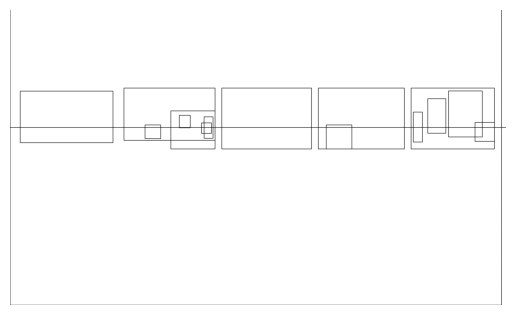

In [61]:
def filter_boxes_by_y(boxes, y_value):
    """y_value를 기준으로 선에 닿는 바운딩 박스만 반환"""
    filtered_boxes = []
    for (x1, y1, x2, y2) in boxes:
        if y1 <= y_value <= y2:
            filtered_boxes.append([x1, y1, x2, y2])
    return filtered_boxes

def draw_horizontal_line(image, y_value, color=(0, 0, 255), thickness=2):
    """이미지에 y축을 기준으로 수평선 그리기"""
    cv2.line(image, (0, y_value), (image.shape[1], y_value), color, thickness)
    return image

# ... [이전 코드]

# y축 값을 설정 (예: 이미지의 중간)
y_value = gray_image.shape[0]*2 // 5 ########이거다############

# 바운딩 박스 필터링
filtered_boxes = filter_boxes_by_y(boxes, y_value)

# 흰 배경 생성
white_background = np.ones_like(gray_image) * 255

# 흰 배경 위에 필터링된 바운딩박스 그리기
boxed_on_white = draw_bounding_boxes(white_background.copy(), filtered_boxes)

# y축을 기준으로 수평선 그리기
boxed_on_white_with_line = draw_horizontal_line(boxed_on_white, y_value)

# 결과 이미지 표시
display_image(boxed_on_white_with_line)
